In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from skimage import feature
import gc

In [ ]:
def lbp(image, num_vizinhos, raio):
  lbp = feature.local_binary_pattern(image, num_vizinhos, raio)
  lbp = np.float32(lbp)
  lbp_hist = cv2.calcHist([lbp],[0],None,[256],(0,256))
  lbp_hist /= lbp_hist.sum() + 1e-9
  return lbp, lbp_hist

In [ ]:
def compareHistChiSqr(image1, image2):
  lbp = feature.local_binary_pattern(image, 8, 1)
  lbp = np.float32(lbp)
  lbp_hist = cv2.calcHist([lbp],[0],None,[256],(0,256))
  lbp_hist /= lbp_hist.sum() + 1e-9

  lbp2 = feature.local_binary_pattern(img, 8, 1)
  lbp2 = np.float32(lbp2)
  lbp2_hist = cv2.calcHist([lbp2],[0],None,[256],(0,256))
  lbp2_hist /= lbp2_hist.sum() + 1e-9

  return cv2.compareHist(lbp_hist, lbp2_hist, cv2.HISTCMP_CHISQR)

In [ ]:
def 

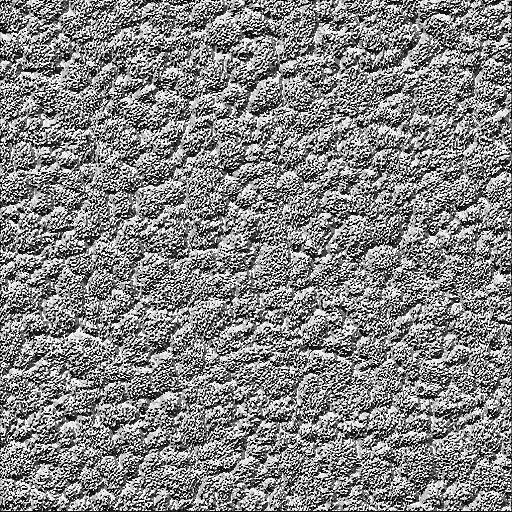

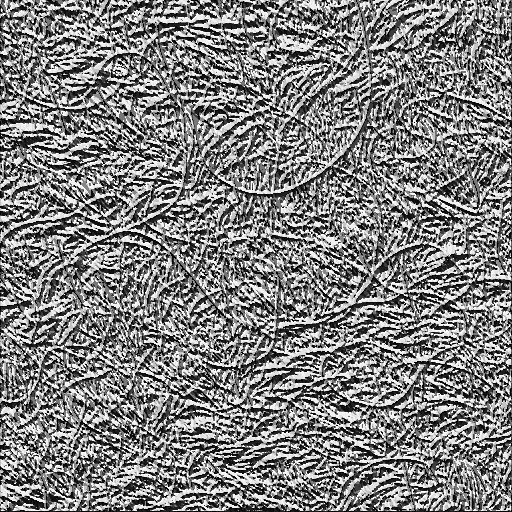

Chi-Square: 0.0


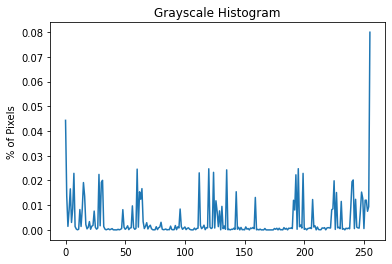

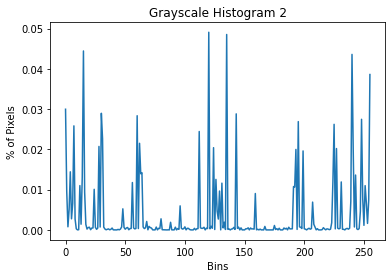

4902

In [ ]:
img = cv2.imread("/content/textura1.png", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("/content/textura3.png", cv2.IMREAD_GRAYSCALE)



plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("")
plt.ylabel("% of Pixels")
plt.plot(lbp_hist)

plt.figure()
plt.title("Grayscale Histogram 2")
plt.xlabel("Bins")
plt.ylabel("% of Pixels")
plt.plot(lbp2_hist)

metric_val = cv2.compareHist(lbp2_hist, lbp2_hist, cv2.HISTCMP_CHISQR)
print("Chi-Square:", metric_val)

plt.show()
gc.collect()